# YOGA poses classification using Convolutional Neural Network (CNN)

## Importing libraries

In [ ]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

## Importing Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!cp -r /content/drive/MyDrive/YOGA.rar /content/

In [ ]:
!pip install rarfile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import rarfile
# Open the .rar file
with rarfile.RarFile('YOGA.rar') as rf:
    # Extract all files to the current directory
    rf.extractall()

In [ ]:
!cp -r /content/YOGA/content/cleaned/DATASET /content/

In [ ]:
!rm -rf YOGA
!rm -rf YOGA.rar

In [ ]:
!rm DATASET/TRAIN/goddess/00000291.jpg
!rm DATASET/TRAIN/tree/00000114.jpg
!rm DATASET/TEST/goddess/00000047.png
!rm DATASET/TEST/tree/00000019.png
!rm DATASET/TEST/tree/00000047.png

## Data Preparation

### Data Preprocessing

removing corrupted images

In [ ]:
def removeCorruptedImages(dataset_directory):
    for directory in os.listdir(dataset_directory):
        for img in os.listdir(os.path.join(dataset_directory, directory)):
            img_path = os.path.join(dataset_directory, directory, img)
            try:
                cv2.imread(img_path)
            except:
                os.remove(img_path)

In [ ]:
train_dataset_directory = 'DATASET/TRAIN'
test_dataset_directory = 'DATASET/TEST'

In [ ]:
removeCorruptedImages(train_dataset_directory)

In [ ]:
removeCorruptedImages(test_dataset_directory)

### Data Exploration

In [ ]:
classes = os.listdir(train_dataset_directory)
classes

['goddess', 'warrior2', 'plank', 'downdog', 'tree']

In [ ]:
def dataset_distribution(dataset_directory, title):
    nbr_imgs_per_class = []
    for directory in os.listdir(dataset_directory):
        nbr_imgs_per_class.append(len(os.listdir(os.path.join(dataset_directory, directory))))
    dataset_distribution = [nbr/sum(nbr_imgs_per_class)*100 for nbr in nbr_imgs_per_class]
    fix, ax = plt .subplots(figsize=(16, 8))
    plt.title(title)
    ax.pie(dataset_distribution, labels=classes, autopct='%1.1f%%', shadow=True, explode = (0.05, 0.05, 0.05, 0.05, 0.05))

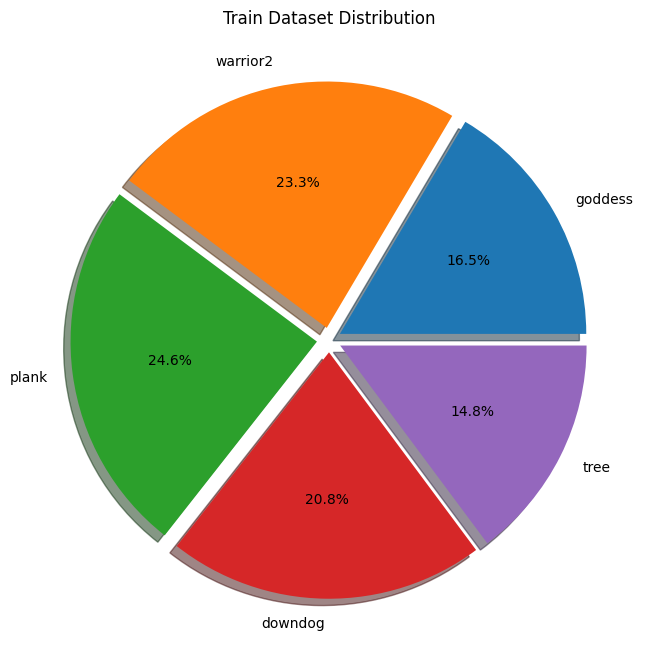

In [ ]:
dataset_distribution(train_dataset_directory, 'Train Dataset Distribution')

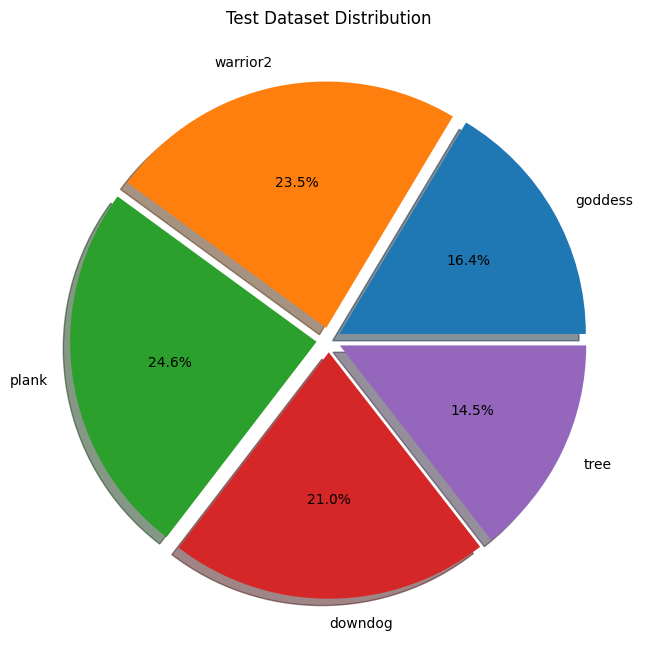

In [ ]:
dataset_distribution(test_dataset_directory, 'Test Dataset Distribution')

***The data is balanaced (No imbalanced data problem)***

### Load Data

In [ ]:
IMG_SIZE = 256

In [ ]:
X_train = []
y_train = []

for i, category in enumerate(classes):
    for img in os.listdir(os.path.join(train_dataset_directory, category)):
        img_path = os.path.join(train_dataset_directory, category, img)
        X_train.append(cv2.resize(cv2.imread(img_path), (IMG_SIZE , IMG_SIZE)))
        y_train.append(i)
X_train = np.asarray(X_train)
y_train = pd.get_dummies(y_train).values

In [ ]:
X_train.shape

(1073, 256, 256, 3)

In [ ]:
X_test = []
y_test = []

for i, category in enumerate(classes):
    for img in os.listdir(os.path.join(test_dataset_directory, category)):
        img_path = os.path.join(test_dataset_directory, category, img)
        X_test.append(cv2.resize(cv2.imread(img_path), (IMG_SIZE , IMG_SIZE)))
        y_test.append(i)
X_test = np.asarray(X_test)
y_test = pd.get_dummies(y_test).values

In [ ]:
X_test.shape

(463, 256, 256, 3)

### Scaling Data

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

### Split Data

In [ ]:
SPLIT_SIZE = 0.2

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train,
    test_size = SPLIT_SIZE,
    random_state = 42)

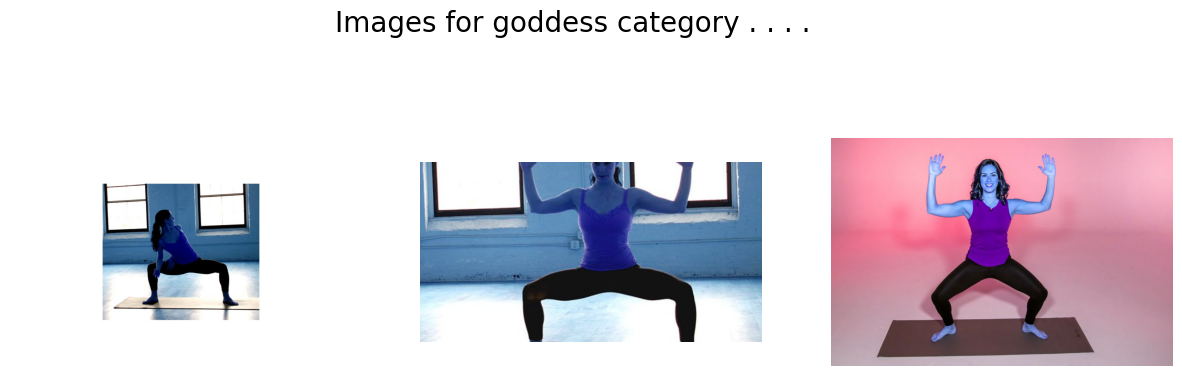

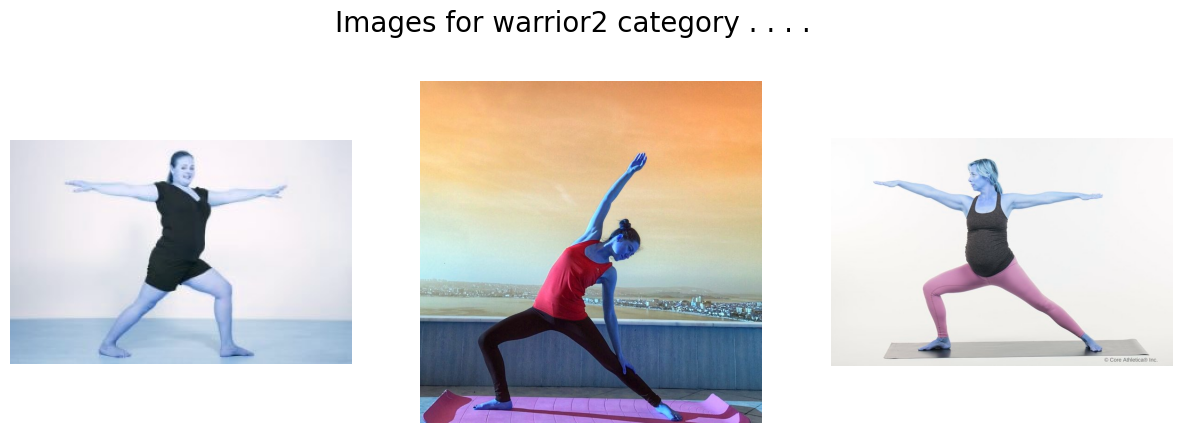

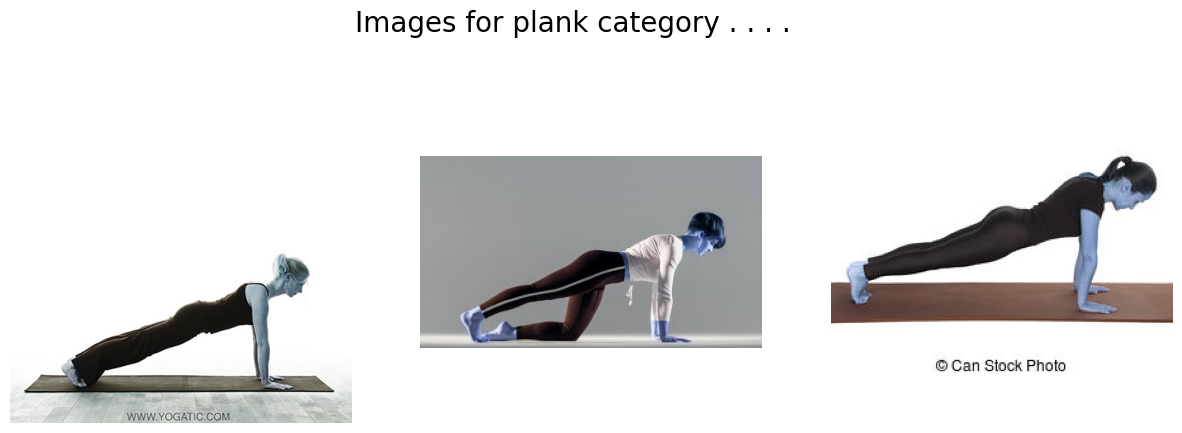

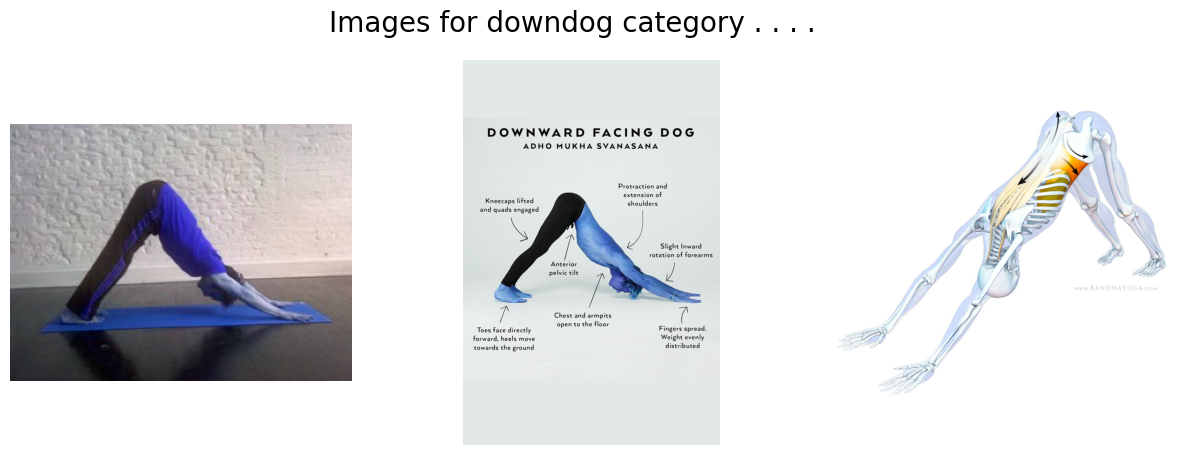

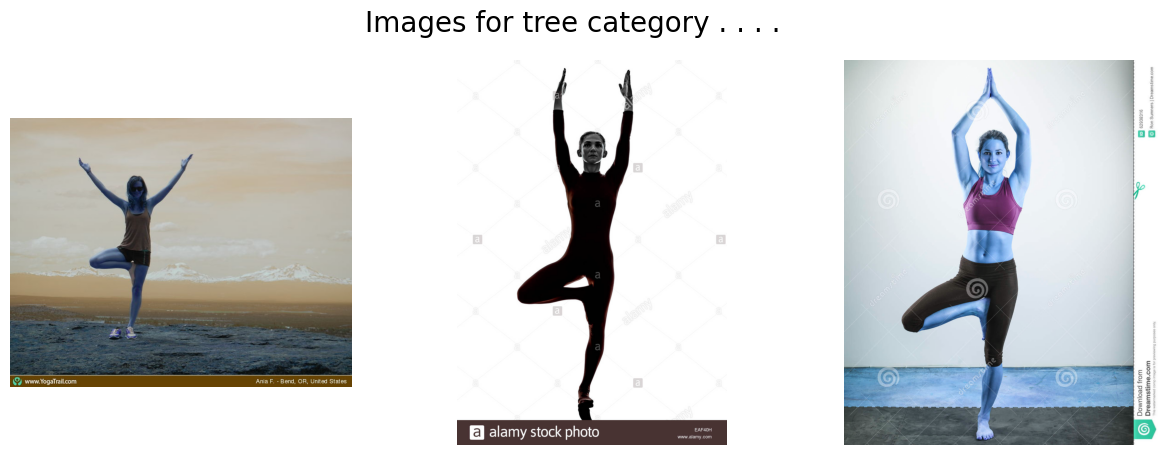

In [ ]:
for category in classes:
    images = os.listdir(os.path.join(train_dataset_directory, category))

    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(f'Images for {category} category . . . .', fontsize=20)

    for i in range(3):
        k = np.random.randint(0, len(images))
        img_path = os.path.join(train_dataset_directory, category, images[k])
        img = np.array(cv2.imread(img_path))
        ax[i].imshow(img)
        ax[i].axis('off')
    plt.show()

## Modeling

### Build the model

***Choosing the optimal number of layers for a convolutional neural network can be challenging as it depends on several factors such as the size of the dataset, the complexity of the problem, and the resources available for training the network.***

***So Starting with a simple architecture with a small number of layers and gradually increasing the number of layers as needed will be the optimal strategy to build and train a CNN with good performance. This can help in preventing overfitting and reduce the risk of computational complexity.***

In [ ]:
model1 = Sequential()

model1.add(Conv2D(8, (3,3), padding='same', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model1.add(MaxPooling2D())

model1.add(Conv2D(16, (3,3), padding='same', activation='relu'))
model1.add(MaxPooling2D())

model1.add(Flatten())

model1.add(Dense(128, activation='relu'))

model1.add(Dense(5, activation='softmax'))

In [ ]:
model1.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 256, 256, 8)       224       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 128, 128, 8)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 16)      1168      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 65536)             0         
                                                                 
 dense_6 (Dense)             (None, 128)              

## Training

In [ ]:
# hyperparameters
EPOCHS = 10
BATCH_SIZE = 8

In [ ]:
history1 = model1.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size = BATCH_SIZE,
    epochs = EPOCHS
)

Epoch 1/10
108/108 [==============================] - 3s 17ms/step - loss: 2.0903 - accuracy: 0.3333 - val_loss: 1.2976 - val_accuracy: 0.5721
Epoch 2/10
108/108 [==============================] - 1s 11ms/step - loss: 0.8037 - accuracy: 0.7378 - val_loss: 0.9633 - val_accuracy: 0.6419
Epoch 3/10
108/108 [==============================] - 1s 11ms/step - loss: 0.2104 - accuracy: 0.9452 - val_loss: 1.1738 - val_accuracy: 0.6558
Epoch 4/10
108/108 [==============================] - 1s 11ms/step - loss: 0.0520 - accuracy: 0.9895 - val_loss: 1.2169 - val_accuracy: 0.6744
Epoch 5/10
108/108 [==============================] - 1s 11ms/step - loss: 0.0572 - accuracy: 0.9860 - val_loss: 1.3872 - val_accuracy: 0.7116
Epoch 6/10
108/108 [==============================] - 1s 11ms/step - loss: 0.0182 - accuracy: 0.9977 - val_loss: 1.3625 - val_accuracy: 0.7070
Epoch 7/10
108/108 [==============================] - 2s 14ms/step - loss: 0.0172 - accuracy: 0.9977 - val_loss: 1.3872 - val_accuracy: 0.7209

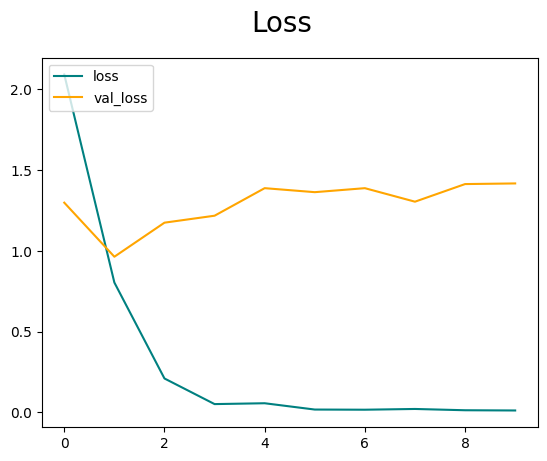

In [ ]:
fig = plt.figure()

plt.plot(history1.history['loss'], color='teal', label='loss')
plt.plot(history1.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

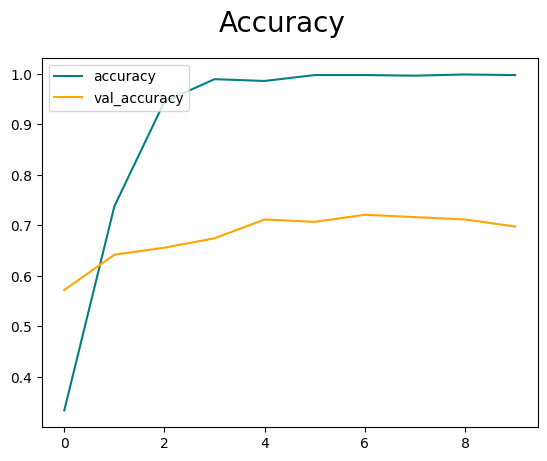

In [ ]:
fig = plt.figure()

plt.plot(history1.history['accuracy'], color='teal', label='accuracy')
plt.plot(history1.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

***The validation loss is increasing, in contrast training loss is decreasing (training accuracy is increasing ), this indicates that our model is overfitting to the training data. In other words, the model is performing well on the training data, but it is not able to generalize well to new, unseen data.***

***One possible solution is to use regularization techniques to prevent overfitting, such as L1 or L2 regularization, dropout, or early stopping, BatchNormalization, early stopping and Reduce Learning Rate On Plateau. These techniques can help the model generalize better to new data and reduce the overfitting.***

***Another possibility is to increase the amount of data used for training. This can help the model to better capture the underlying patterns in the data and reduce the overfitting. For that we can use data augmentation***

**Finally, it is important to consider the specific problem we are working on and the nature of the data. Some problems may require more complex models with more layers, while others may require simpler models with fewer layers.Experimentation and trial-and-error can often help in determining the optimal architecture for a given problem. So we will keep playing with the architecture, fine tuning the hyperparameters until reaching good results.**

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_accuracy') > 0.90:
            print('\n Validation accuracy has reached upto \
            90% so, stopping further training.')
            self.model.stop_training = True


es = EarlyStopping(patience=3,
                   monitor='val_accuracy',
                   restore_best_weights=True)

lr = ReduceLROnPlateau(monitor='val_loss',
                       patience=2,
                       factor=0.5,
                       verbose=1)

In [ ]:
model2 = Sequential()
model2.add(Conv2D(16, (3,3), 1, padding='same', activation='relu', input_shape=(256,256,3)))
model2.add(MaxPooling2D())
model2.add(Conv2D(32, (3,3), 1, padding='same', activation='relu'))
model2.add(MaxPooling2D())
model2.add(Conv2D(16, (3,3), 1, padding='same', activation='relu'))
model2.add(MaxPooling2D())
model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dense(5, activation='softmax'))

In [ ]:
model2.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history2 = model2.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    callbacks = [es, lr, myCallback()]
)

Epoch 1/10
108/108 [==============================] - 4s 18ms/step - loss: 1.5655 - accuracy: 0.3520 - val_loss: 1.3678 - val_accuracy: 0.4884 - lr: 0.0010
Epoch 2/10
108/108 [==============================] - 1s 12ms/step - loss: 1.1004 - accuracy: 0.5956 - val_loss: 1.1780 - val_accuracy: 0.5349 - lr: 0.0010
Epoch 3/10
108/108 [==============================] - 1s 12ms/step - loss: 0.6260 - accuracy: 0.7774 - val_loss: 1.1456 - val_accuracy: 0.6512 - lr: 0.0010
Epoch 4/10
108/108 [==============================] - 1s 14ms/step - loss: 0.2561 - accuracy: 0.9196 - val_loss: 1.3997 - val_accuracy: 0.6558 - lr: 0.0010
Epoch 5/10
105/108 [============================>.] - ETA: 0s - loss: 0.1572 - accuracy: 0.9500
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
108/108 [==============================] - 2s 15ms/step - loss: 0.1556 - accuracy: 0.9510 - val_loss: 1.5020 - val_accuracy: 0.6837 - lr: 0.0010
Epoch 6/10
108/108 [==============================] - 1s 14

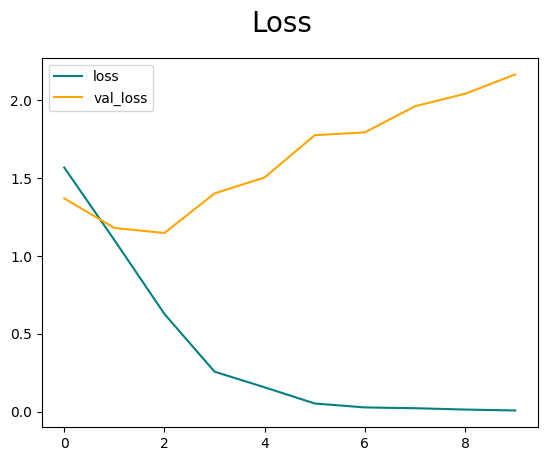

In [ ]:
fig = plt.figure()

plt.plot(history2.history['loss'], color='teal', label='loss')
plt.plot(history2.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

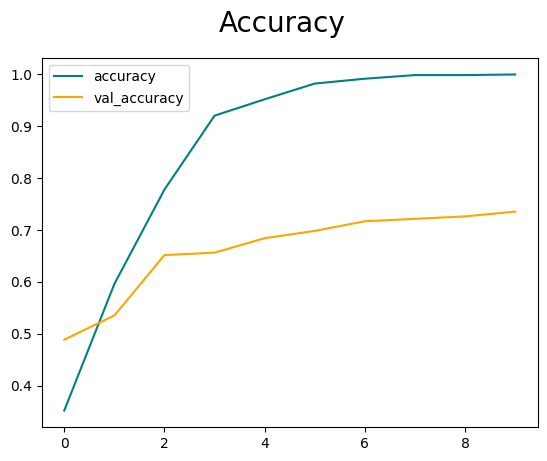

In [ ]:
fig = plt.figure()

plt.plot(history2.history['accuracy'], color='teal', label='accuracy')
plt.plot(history2.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
model3 = Sequential()
model3.add(Conv2D(16, (3,3), 1, padding='same', activation='relu', input_shape=(256,256,3)))
model3.add(Dropout(0.3))
model3.add(MaxPooling2D())
model3.add(Conv2D(32, (3,3), 1, padding='same', activation='relu'))
model3.add(Dropout(0.3))
model3.add(MaxPooling2D())
model3.add(Conv2D(16, (3,3), 1, padding='same', activation='relu'))
model3.add(Dropout(0.3))
model3.add(MaxPooling2D())
model3.add(Flatten())
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.3))
model3.add(Dense(5, activation='softmax'))

In [ ]:
model3.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history3 = model3.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    callbacks = [es, lr, myCallback()]
)

Epoch 1/10
108/108 [==============================] - 4s 24ms/step - loss: 1.8598 - accuracy: 0.3368 - val_loss: 1.4751 - val_accuracy: 0.4233 - lr: 0.0010
Epoch 2/10
108/108 [==============================] - 2s 19ms/step - loss: 1.0924 - accuracy: 0.5874 - val_loss: 1.2471 - val_accuracy: 0.5814 - lr: 0.0010
Epoch 3/10
108/108 [==============================] - 2s 19ms/step - loss: 0.6565 - accuracy: 0.7762 - val_loss: 1.1018 - val_accuracy: 0.6047 - lr: 0.0010
Epoch 4/10
108/108 [==============================] - 2s 21ms/step - loss: 0.3385 - accuracy: 0.8834 - val_loss: 1.0929 - val_accuracy: 0.6512 - lr: 0.0010
Epoch 5/10
108/108 [==============================] - 2s 21ms/step - loss: 0.1694 - accuracy: 0.9452 - val_loss: 1.0258 - val_accuracy: 0.6651 - lr: 0.0010
Epoch 6/10
108/108 [==============================] - 2s 21ms/step - loss: 0.1154 - accuracy: 0.9627 - val_loss: 1.1838 - val_accuracy: 0.6372 - lr: 0.0010
Epoch 7/10
106/108 [============================>.] - ETA: 0s - 

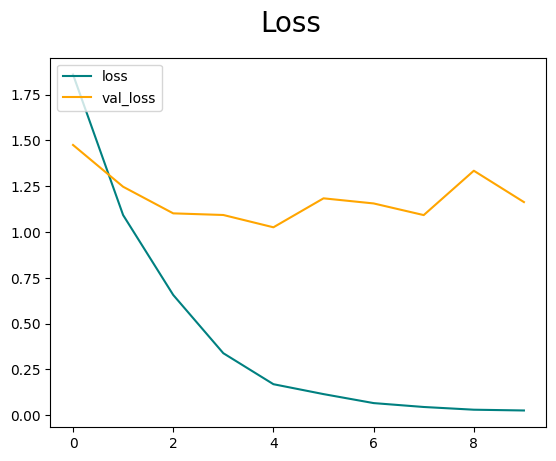

In [ ]:
fig = plt.figure()

plt.plot(history3.history['loss'], color='teal', label='loss')
plt.plot(history3.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

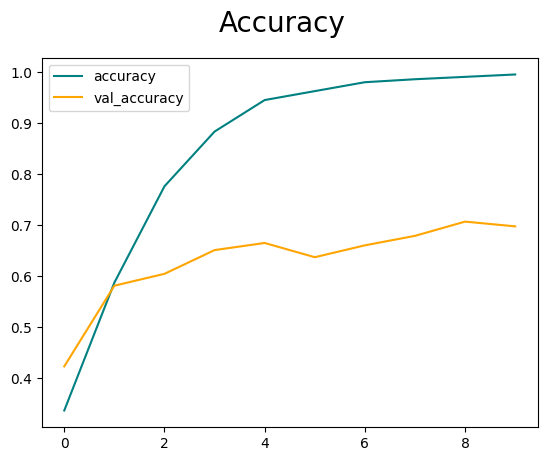

In [ ]:
fig = plt.figure()

plt.plot(history3.history['accuracy'], color='teal', label='accuracy')
plt.plot(history3.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
model4 = Sequential()
model4.add(Conv2D(16, (3,3), 1, padding='same', activation='relu', input_shape=(256,256,3)))
model4.add(Dropout(0.3))
model4.add(BatchNormalization())
model4.add(MaxPooling2D())
model4.add(Conv2D(32, (3,3), 1, padding='same', activation='relu'))
model4.add(Dropout(0.3))
model4.add(BatchNormalization())
model4.add(MaxPooling2D())
model4.add(Conv2D(16, (3,3), 1, padding='same', activation='relu'))
model4.add(Dropout(0.3))
model4.add(BatchNormalization())
model4.add(MaxPooling2D())
model4.add(Flatten())
model4.add(Dense(256, activation='relu'))
model4.add(Dropout(0.3))
model4.add(BatchNormalization())
model4.add(Dense(5, activation='softmax'))

In [ ]:
model4.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history4 = model4.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    callbacks = [es, lr, myCallback()]
)

Epoch 1/10
108/108 [==============================] - 7s 30ms/step - loss: 1.7444 - accuracy: 0.3403 - val_loss: 7.1675 - val_accuracy: 0.2140 - lr: 0.0010
Epoch 2/10
108/108 [==============================] - 3s 23ms/step - loss: 1.1956 - accuracy: 0.5385 - val_loss: 9.8071 - val_accuracy: 0.2140 - lr: 0.0010
Epoch 3/10
107/108 [============================>.] - ETA: 0s - loss: 0.9259 - accuracy: 0.6484
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
108/108 [==============================] - 3s 26ms/step - loss: 0.9250 - accuracy: 0.6492 - val_loss: 10.7837 - val_accuracy: 0.2140 - lr: 0.0010
Epoch 4/10
108/108 [==============================] - 3s 26ms/step - loss: 0.7056 - accuracy: 0.7448 - val_loss: 6.9524 - val_accuracy: 0.2558 - lr: 5.0000e-04
Epoch 5/10
108/108 [==============================] - 3s 24ms/step - loss: 0.6288 - accuracy: 0.7890 - val_loss: 3.8880 - val_accuracy: 0.4000 - lr: 5.0000e-04
Epoch 6/10
108/108 [==============================

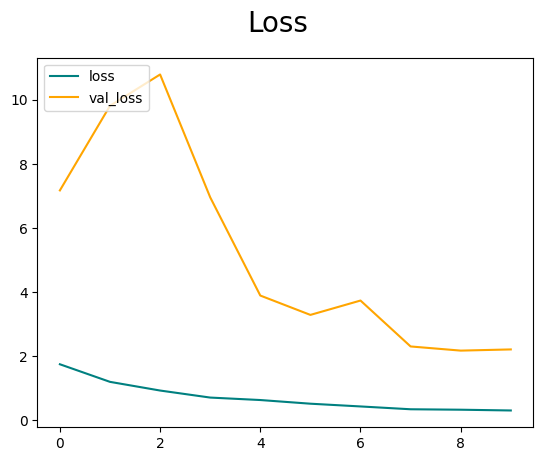

In [ ]:
fig = plt.figure()

plt.plot(history4.history['loss'], color='teal', label='loss')
plt.plot(history4.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

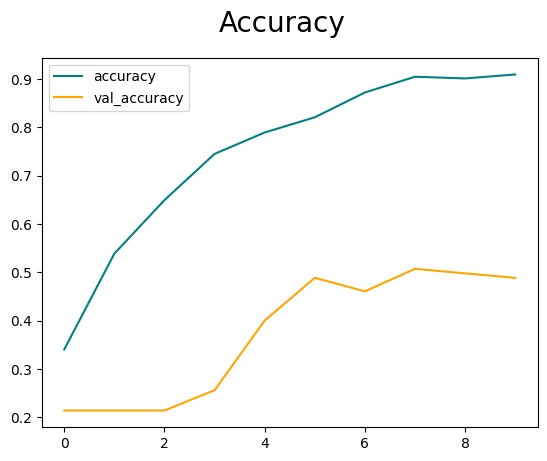

In [ ]:
fig = plt.figure()

plt.plot(history4.history['accuracy'], color='teal', label='accuracy')
plt.plot(history4.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
model5 = Sequential()
model5.add(Conv2D(32, (5,5), padding='same', activation='relu', input_shape=(256,256,3)))
model5.add(MaxPooling2D((2,2)))
model5.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model5.add(MaxPooling2D((2,2)))
model5.add(Conv2D(128, (3,3), 1, padding='same', activation='relu'))
model5.add(MaxPooling2D((2,2)))
model5.add(Flatten())
model5.add(Dense(256, activation='relu'))
model5.add(BatchNormalization())
model5.add(Dense(128, activation='relu'))
model5.add(Dropout(0.3))
model5.add(Dense(5, activation='softmax'))

In [ ]:
model5.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history5 = model5.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    callbacks = [es, lr, myCallback()]
)

Epoch 1/10
  5/108 [>.............................] - ETA: 2s - loss: 1.9224 - accuracy: 0.4500

108/108 [==============================] - 9s 46ms/step - loss: 1.6850 - accuracy: 0.2832 - val_loss: 6.9841 - val_accuracy: 0.2233 - lr: 0.0010
Epoch 2/10
108/108 [==============================] - 3s 30ms/step - loss: 1.5133 - accuracy: 0.3613 - val_loss: 4.3379 - val_accuracy: 0.2698 - lr: 0.0010
Epoch 3/10
108/108 [==============================] - 3s 28ms/step - loss: 1.3080 - accuracy: 0.4510 - val_loss: 3.6803 - val_accuracy: 0.2605 - lr: 0.0010
Epoch 4/10
108/108 [==============================] - 3s 30ms/step - loss: 1.0302 - accuracy: 0.6154 - val_loss: 2.2408 - val_accuracy: 0.2837 - lr: 0.0010
Epoch 5/10
108/108 [==============================] - 4s 39ms/step - loss: 0.9111 - accuracy: 0.6783 - val_loss: 1.3059 - val_accuracy: 0.5163 - lr: 0.0010
Epoch 6/10
108/108 [==============================] - 3s 29ms/step - loss: 0.7426 - accuracy: 0.7319 - val_loss: 1.3719 - val_accuracy: 0.5070 - lr: 0.0010
Epoch 7/10
106/108 [============================>.] - ETA: 0s - loss: 0.611

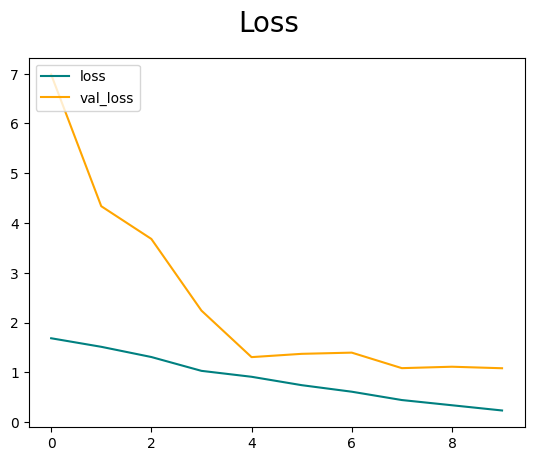

In [ ]:
fig = plt.figure()

plt.plot(history5.history['loss'], color='teal', label='loss')
plt.plot(history5.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

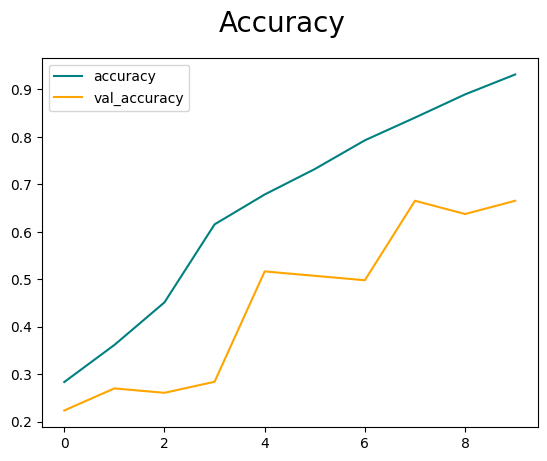

In [ ]:
fig = plt.figure()

plt.plot(history5.history['accuracy'], color='teal', label='accuracy')
plt.plot(history5.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Testing

In [ ]:
y_test = np.argmax(y_test, axis=1)

In [ ]:
y_pred = model1.predict(X_test)

15/15 [==============================] - 1s 27ms/step


In [ ]:
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
metrics.confusion_matrix(y_test, y_pred)

array([[55, 11,  1,  9,  0],
       [34, 62,  2,  7,  4],
       [ 4,  4, 71, 18,  0],
       [ 8,  8,  9, 88,  1],
       [ 2,  3,  1,  0, 61]])

In [ ]:
print(metrics.classification_report(y_test, y_pred,target_names=classes))

              precision    recall  f1-score   support

     goddess       0.53      0.72      0.61        76
    warrior2       0.70      0.57      0.63       109
     downdog       0.85      0.73      0.78        97
       plank       0.72      0.77      0.75       114
        tree       0.92      0.91      0.92        67

    accuracy                           0.73       463
   macro avg       0.75      0.74      0.74       463
weighted avg       0.74      0.73      0.73       463



In [ ]:
y_pred = model2.predict(X_test)

15/15 [==============================] - 0s 16ms/step


In [ ]:
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
metrics.confusion_matrix(y_test, y_pred)

array([[53, 13,  5,  5,  0],
       [33, 64, 10,  2,  0],
       [ 2,  3, 81, 11,  0],
       [ 5,  7,  9, 93,  0],
       [ 2,  6,  1,  1, 57]])

In [ ]:
print(metrics.classification_report(y_test, y_pred,target_names=classes))

              precision    recall  f1-score   support

     goddess       0.56      0.70      0.62        76
    warrior2       0.69      0.59      0.63       109
     downdog       0.76      0.84      0.80        97
       plank       0.83      0.82      0.82       114
        tree       1.00      0.85      0.92        67

    accuracy                           0.75       463
   macro avg       0.77      0.76      0.76       463
weighted avg       0.76      0.75      0.75       463



In [ ]:
y_pred = model3.predict(X_test)

15/15 [==============================] - 0s 16ms/step


In [ ]:
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
metrics.confusion_matrix(y_test, y_pred)

array([[46, 13,  7,  6,  4],
       [11, 89,  6,  3,  0],
       [ 1,  6, 74, 14,  2],
       [ 5,  3, 11, 94,  1],
       [ 1,  3,  2,  0, 61]])

In [ ]:
print(metrics.classification_report(y_test, y_pred,target_names=classes))

              precision    recall  f1-score   support

     goddess       0.72      0.61      0.66        76
    warrior2       0.78      0.82      0.80       109
     downdog       0.74      0.76      0.75        97
       plank       0.80      0.82      0.81       114
        tree       0.90      0.91      0.90        67

    accuracy                           0.79       463
   macro avg       0.79      0.78      0.78       463
weighted avg       0.78      0.79      0.78       463



In [ ]:
y_pred = model4.predict(X_test)

15/15 [==============================] - 0s 19ms/step


In [ ]:
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
metrics.confusion_matrix(y_test, y_pred)

array([[36,  4, 23,  8,  5],
       [29, 34, 26, 15,  5],
       [ 0,  1, 71, 23,  2],
       [ 3,  4, 28, 74,  5],
       [ 0,  6,  7,  4, 50]])

In [ ]:
print(metrics.classification_report(y_test, y_pred,target_names=classes))

              precision    recall  f1-score   support

     goddess       0.53      0.47      0.50        76
    warrior2       0.69      0.31      0.43       109
     downdog       0.46      0.73      0.56        97
       plank       0.60      0.65      0.62       114
        tree       0.75      0.75      0.75        67

    accuracy                           0.57       463
   macro avg       0.60      0.58      0.57       463
weighted avg       0.60      0.57      0.56       463



In [ ]:
y_pred = model5.predict(X_test)

15/15 [==============================] - 1s 45ms/step


In [ ]:
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
print(metrics.classification_report(y_test, y_pred,target_names=classes))

              precision    recall  f1-score   support

     goddess       0.86      0.32      0.46        76
    warrior2       0.69      0.85      0.76       109
     downdog       0.74      0.77      0.76        97
       plank       0.72      0.89      0.80       114
        tree       0.95      0.81      0.87        67

    accuracy                           0.75       463
   macro avg       0.79      0.73      0.73       463
weighted avg       0.77      0.75      0.74       463



## HyperParameter Tuning

In [ ]:
from tensorflow.keras.optimizers import SGD

In [ ]:
def build_model(learning_rate=0.01, momentum=0.1):
  model = Sequential()
  model.add(Conv2D(16, (3,3), 1, padding='same', activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,3)))
  model.add(Dropout(0.1))
  model.add(BatchNormalization())
  model.add(MaxPooling2D())
  model.add(Conv2D(32, (3,3), 1, padding='same', activation='relu'))
  model.add(Dropout(0.1))
  model.add(BatchNormalization())
  model.add(MaxPooling2D())
  model.add(Conv2D(16, (3,3), 1, padding='same', activation='relu'))
  model.add(Dropout(0.1))
  model.add(BatchNormalization())
  model.add(MaxPooling2D())
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.1))
  model.add(BatchNormalization())
  model.add(Dense(5, activation='softmax'))
  model.compile(optimizer= SGD(lr=learning_rate, momentum=momentum), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
BATCH_SIZE = 8
EPOCHS = 10

In [ ]:
model = KerasClassifier(build_fn=build_model,
                        epochs=EPOCHS,
                        batch_size=BATCH_SIZE,
                        verbose=1)

<ipython-input-86-8babcf4626d1>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=build_model,


In [ ]:
learning_rate = [0.0001, 0.001, 0.01, 0.1]
momentum = [0.3, 0.5, 0.7, 0.9]

In [ ]:
param_grid = dict(learning_rate=learning_rate, momentum=momentum)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid = GridSearchCV(estimator=model, param_grid = param_grid, n_jobs=-1, cv=3)

In [ ]:
grid_result = grid.fit(X_train, y_train)

In [ ]:
print(grid_result.best_score_, grid_result.best_params_)